In [1]:
# from bao import *
from static import *
from stock_data import *
from efficient_frontier import *
from backtest import *

* **I would like to build 10 portfolios that with specific return and give back portfolio allocation with best variance**
* **Then testing stategy that following best variance through out the posible time**
* **Time for train is 1 year and result applying is also 1 year**

In [2]:
stock = StockData("./data/stock/", "./stock_dictionary.json")
stock_data, _ = stock.get_data()
with open(PATH_INDEX, "r") as a:
    index_l = json.load(a)
stock_data.drop(columns=["symbol"], inplace=True)

In [3]:
market_df = stock_data[
    (stock_data["market_value"] > 0)
    & (stock_data["ticker"].str.len() == 3)
    & (stock_data["ticker"].isin(index_l["VN100"]))
][["ticker", "market_value", "log_return", "time", "exchange"]].dropna(
    subset=["log_return"]
)
market_df_stat, market_df = summary_market(market_df)

# Test VN30 stock

In [4]:
results, beta, weight = tracking(
    stock_data, stock_list=index_l["VN30"], num_portfolios=16
)

In [5]:
weight.to_parquet("./data/weight_vn30.parquet")

In [6]:
weight

ticker            ACB           BCM           BID           BVH           CTG  \
year                                                                            
2018 0   4.882284e-18  0.000000e+00  2.231144e-17  0.000000e+00  2.436826e-17   
     1   0.000000e+00  8.872524e-18  0.000000e+00  2.995021e-17  5.187204e-18   
     2   0.000000e+00  1.677610e-18  0.000000e+00  0.000000e+00  0.000000e+00   
     3   0.000000e+00  4.739069e-18  0.000000e+00  0.000000e+00  1.991603e-17   
     4   0.000000e+00  2.504372e-18  0.000000e+00  2.124971e-18  4.258704e-18   
...               ...           ...           ...           ...           ...   
2017 13  2.630124e-01           NaN  0.000000e+00  1.497554e-17  7.173912e-01   
     14  3.043864e-01           NaN  0.000000e+00  0.000000e+00  6.956136e-01   
     15  4.372401e-01           NaN  0.000000e+00  0.000000e+00  5.627599e-01   
     16  5.700939e-01           NaN  0.000000e+00  1.769418e-16  4.299061e-01   
     17  7.029476e-01           NaN  0.000000e+00  7.743914e-17  2.970524e-01   

ticker            FPT           GAS           GVR           HDB           HPG  \
year                                                                            
2018 0   2.908084e-17  0.000000e+00  3.234456e-17  0.000000e+00  6.509599e-18   
     1   4.480702e-18  0.000000e+00  7.566623e-03  8.135219e-18  0.000000e+00   
     2   0.000000e+00  7.629785e-18  1.680197e-02  7.535409e-03  0.000000e+00   
     3   7.521046e-03  1.224380e-17  1.890998e-02  1.382265e-02  0.000000e+00   
     4   2.428584e-02  0.000000e+00  1.843585e-02  1.290433e-02  0.000000e+00   
...               ...           ...           ...           ...           ...   
2017 13  0.000000e+00  2.230746e-17           NaN           NaN  0.000000e+00   
     14  2.602085e-17  0.000000e+00           NaN           NaN  0.000000e+00   
     15  5.204170e-18  1.270685e-16           NaN           NaN  5.377643e-17   
     16  1.561251e-17  0.000000e+00           NaN           NaN  0.000000e+00   
     17  0.000000e+00  8.375462e-18           NaN           NaN  0.000000e+00   

ticker   ...           VCB           VHM           VIB           VIC  \
year     ...                                                           
2018 0   ...  2.534481e-17  0.000000e+00  0.000000e+00  0.000000e+00   
     1   ...  4.016919e-18  0.000000e+00  5.973997e-18  1.211842e-17   
     2   ...  3.140248e-18  5.067555e-18  0.000000e+00  1.770394e-17   
     3   ...  5.578874e-02  0.000000e+00  1.074776e-17  0.000000e+00   
     4   ...  1.171560e-01  1.518197e-19  3.807662e-18  3.997533e-03   
...      ...           ...           ...           ...           ...   
2017 13  ...  2.088851e-16  1.959646e-02  7.911965e-17  0.000000e+00   
     14  ...  0.000000e+00  0.000000e+00  0.000000e+00  5.854692e-17   
     15  ...  0.000000e+00  0.000000e+00  2.602085e-17  6.418477e-17   
     16  ...  1.335737e-16  0.000000e+00  3.035766e-17  0.000000e+00   
     17  ...  0.000000e+00  3.848918e-18  4.607859e-19  1.328961e-16   

ticker            VJC           VNM           VPB           VRE  year  SSB  
year                                                                        
2018 0   1.684330e-18  3.476717e-01  1.162723e-18  1.288770e-01  2018  NaN  
     1   1.770616e-17  3.192994e-01  1.741143e-18  1.060445e-01  2018  NaN  
     2   0.000000e+00  2.948496e-01  0.000000e+00  7.284654e-02  2018  NaN  
     3   4.004032e-18  2.712829e-01  0.000000e+00  4.129990e-02  2018  NaN  
     4   3.393720e-18  2.469385e-01  1.274519e-17  0.000000e+00  2018  NaN  
...               ...           ...           ...           ...   ...  ...  
2017 13  6.837250e-17  0.000000e+00  0.000000e+00  0.000000e+00  2017  NaN  
     14  4.033232e-17  1.561251e-17  9.844556e-17  2.302845e-16  2017  NaN  
     15  9.714451e-17  0.000000e+00  2.396087e-16  1.318390e-16  2017  NaN  
     16  0.000000e+00  1.127570e-17  0.000000e+00  0.000000e+00  2017  NaN  
     17  0.000000e+00  0.000000

In [22]:
weight["year"] = weight.index.get_level_values(0)
weight["rank"] = weight.index.get_level_values(1)
weight.reset_index(drop=True, inplace=True)

In [23]:
weight

ticker,ACB,BCM,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,...,VHM,VIB,VIC,VJC,VNM,VPB,VRE,year,SSB,rank
0,4.882284e-18,0.000000e+00,2.231144e-17,0.000000e+00,2.436826e-17,2.908084e-17,0.000000e+00,3.234456e-17,0.000000e+00,6.509599e-18,...,0.000000e+00,0.000000e+00,0.000000e+00,1.684330e-18,3.476717e-01,1.162723e-18,1.288770e-01,2018,NaN,0
1,0.000000e+00,8.872524e-18,0.000000e+00,2.995021e-17,5.187204e-18,4.480702e-18,0.000000e+00,7.566623e-03,8.135219e-18,0.000000e+00,...,0.000000e+00,5.973997e-18,1.211842e-17,1.770616e-17,3.192994e-01,1.741143e-18,1.060445e-01,2018,NaN,1
2,0.000000e+00,1.677610e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.629785e-18,1.680197e-02,7.535409e-03,0.000000e+00,...,5.067555e-18,0.000000e+00,1.770394e-17,0.000000e+00,2.948496e-01,0.000000e+00,7.284654e-02,2018,NaN,2
3,0.000000e+00,4.739069e-18,0.000000e+00,0.000000e+00,1.991603e-17,7.521046e-03,1.224380e-17,1.890998e-02,1.382265e-02,0.000000e+00,...,0.000000e+00,1.074776e-17,0.000000e+00,4.004032e-18,2.712829e-01,0.000000e+00,4.129990e-02,2018,NaN,3
4,0.000000e+00,2.504372e-18,0.000000e+00,2.124971e-18,4.258704e-18,2.428584e-02,0.000000e+00,1.843585e-02,1.290433e-02,0.000000e+00,...,1.518197e-19,3.807662e-18,3.997533e-03,3.393720e-18,2.469385e-01,1.274519e-17,0.000000e+00,2018,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,2.630124e-01,NaN,0.000000e+00,1.497554e-17,7.173912e-01,0.000000e+00,2.230746e-17,NaN,NaN,0.000000e+00,...,1.959646e-02,7.911965e-17,0.000000e+00,6.837250e-17,0.000000e+00,0.000000e+00,0.000000e+00,2017,NaN,13
212,3.043864e-01,NaN,0.000000e+00,0.000000e+00,6.956136e-01,2.602085e-17,0.000000e+00,NaN,NaN,0.000000e+00,...,0.000000e+00,0.000000e+00,5.854692e-17,4.033232e-17,1.561251e-17,9.844556e-17,2.302845e-16,2017,NaN,14
213,4.372401e-01,NaN,0.000000e+00,0.000000e+00,5.627599e-01,5.204170e-18,1.270685e-16,NaN,NaN,5.377643e-17,...,0.000000e+00,2.602085e-17,6.418477e-17,9.714451e-17,0.000000e+00,2.396087e-16,1.318390e-16,2017,NaN,15
214,5.700939e-01,NaN,0.000000e+00,1.769418e-16,4.299061e-01,1.561251e-17,0.000000e+00,NaN,NaN,0.000000e+00,...,0.000000e+00,3.035766e-17,0.000000e+00,0.000000e+00,1.127570e-17,0.000000e+00,0.000000e+00,2017,NaN,16


In [14]:
import json

# 'weight' is already defined as a DataFrame in the previous cell
data_dict = {}
melted = weight.melt(
    id_vars=["year", "rank"],
    var_name="ticker",
    value_name="weight",
)
melted["weight"] = melted["weight"].fillna(0)

In [20]:
melted.pivot(index=["year", "rank"], columns="ticker", values="weight")

ticker              ACB           BCM  BID           BVH       CTG  \
year rank                                                            
2013 0     9.454837e-02  0.000000e+00  0.0  0.000000e+00  0.811876   
     1     3.127264e-01  0.000000e+00  0.0  1.272582e-17  0.436942   
     2     1.426255e-01  0.000000e+00  0.0  0.000000e+00  0.199525   
     3     0.000000e+00  0.000000e+00  0.0  7.507478e-18  0.000000   
     4     6.260154e-18  0.000000e+00  0.0  0.000000e+00  0.000000   
...                 ...           ...  ...           ...       ...   
2024 13    0.000000e+00  1.129240e-17  0.0  3.421369e-02  0.555571   
     14    1.730118e-17  0.000000e+00  0.0  6.371463e-03  0.651891   
     15    0.000000e+00  6.280536e-18  0.0  0.000000e+00  0.549923   
     16    9.799674e-17  0.000000e+00  0.0  0.000000e+00  0.446976   
     17    0.000000e+00  0.000000e+00  0.0  1.122895e-16  0.344125   

ticker              FPT           GAS           GVR       HDB           HPG  \
year rank                                                                     
2013 0     3.489776e-18  2.077602e-17  0.000000e+00  0.000000  3.649696e-17   
     1     4.092863e-17  0.000000e+00  0.000000e+00  0.000000  0.000000e+00   
     2     0.000000e+00  0.000000e+00  0.000000e+00  0.000000  1.713039e-17   
     3     2.095410e-17  1.061802e-02  0.000000e+00  0.000000  0.000000e+00   
     4     1.131238e-17  7.692745e-02  0.000000e+00  0.000000  0.000000e+00   
...                 ...           ...           ...       ...           ...   
2024 13    2.223081e-17  0.000000e+00  0.000000e+00  0.115266  3.607264e-18   
     14    0.000000e+00  0.000000e+00  0.000000e+00  0.126752  1.325873e-17   
     15    9.577436e-02  1.175392e-17  1.388432e-17  0.145460  0.000000e+00   
     16    1.970424e-01  5.051571e-17  4.702818e-18  0.157514  0.000000e+00   
     17    2.983802e-01  5.497155e-17  3.533887e-17  0.169487  0.000000e+00   

ticker     ...       TCB           TPB           VCB           VHM  \
year rank  ...                                                       
2013 0     ...  0.000000  0.000000e+00  0.000000e+00  1.159012e-16   
     1     ...  0.000000  0.000000e+00  7.026985e-17  2.105558e-01   
     2     ...  0.000000  0.000000e+00  0.000000e+00  6.396914e-01   
     3     ...  0.000000  0.000000e+00  4.638902e-03  9.491827e-01   
     4     ...  0.000000  0.000000e+00  3.359339e-02  6.317801e-01   
...        ...       ...           ...           ...           ...   
2024 13    ...  0.178657  1.753184e-17  7.273376e-19  0.000000e+00   
     14    ...  0.214985  0.000000e+00  1.971384e-17  7.134443e-18   
     15    ...  0.208842  3.217560e-17  0.000000e+00  0.000000e+00   
     16    ...  0.198468  7.322157e-18  6.890556e-18  7.548248e-18   
     17    ...  0.188008  0.000000e+00  2.894284e-17  0.000000e+00   

ticker              VIB           VIC           VJC           VNM  \
year rank                                                           
2013 0     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
     1     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
     2     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
     3     0.000000e+00  3.920529e-18  0.000000e+00  5.723349e-04   
     4     0.000000e+00  0.000000e+00  0.000000e+00  4.156257e-03   
...                 ...           ...           ...           ...   
2024 13    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
     14    6.012538e-18  0.000000e+00  2.964828e-19  4.008930e-18   
     15    0.000000e+00  1.826341e-17  2.896115e-17  8.405227e-18   
     16    0.000000e+00  0.000000e+00  0.000000e+00  1.008141e-17   
     17    8.116461e-18  0.000000e+00  0.000000e+00  0.000000e+00   

ticker              VPB           VRE  
year rank                              
2013 0     0.000000e+00  0.000000e+00  
     1     0.000000e+00  0.000000e+00  
     2     0.000000e+00  0.000000e+00  
     3     0.000000e+00  0.000000e+00  
     4     0

In [17]:
for _, row in melted.iterrows():
    y = str(row["year"])
    t = row["ticker"]
    w = row["weight"]
    data_dict.setdefault(y, {})[t] = w

with open("port_30.json", "w") as f:
    json.dump(data_dict, f, indent=4)

In [7]:
weight.drop(columns="year").sum(axis=1)

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
     ... 
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
Length: 216, dtype: float64

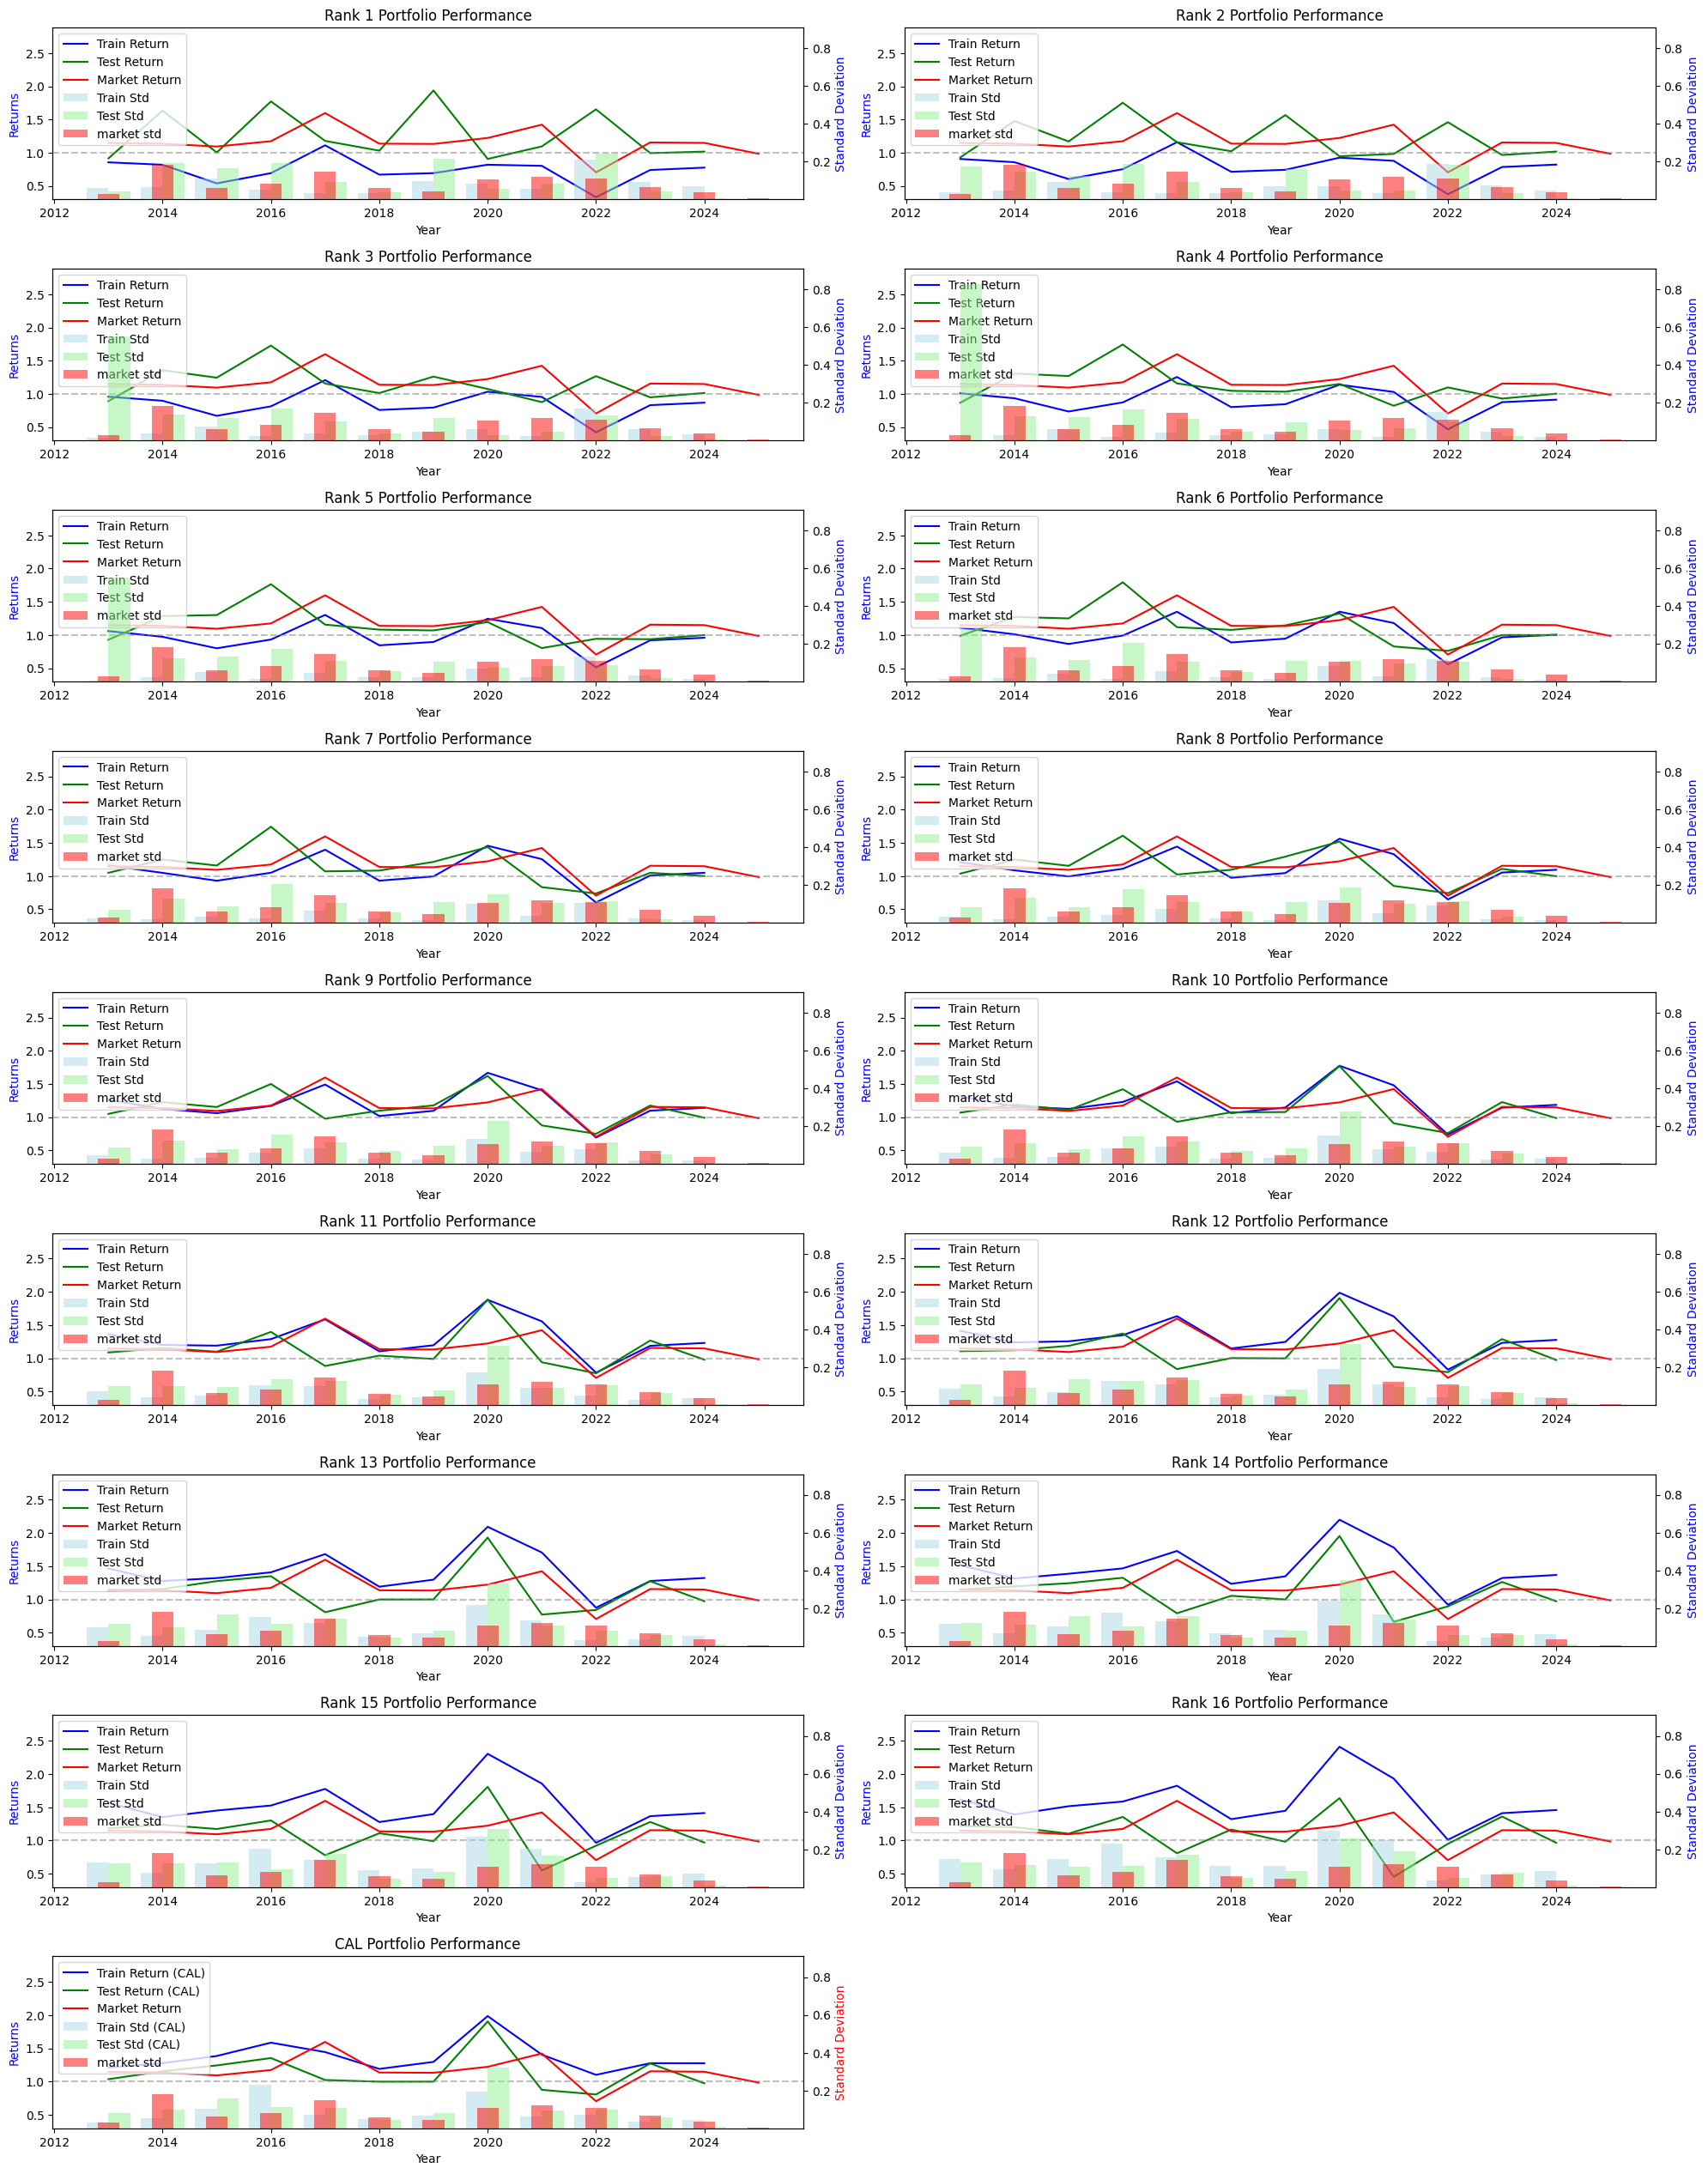

In [10]:
plot_backtest_stategy(results, market_df_stat, num_portfolios=16)

In [11]:
df_list = [pd.concat([i[i["port"] == j] for i in beta]) for j in range(1, 16)]

In [12]:
result = []
risk_free_rate = 0.05
for j, i in enumerate(df_list):
    train = i[i["train"].notna()]
    test = i[i["test"].notna()]
    train = train.merge(
        market_df[["time", "market_log_return"]], on="time", how="inner"
    )
    test = test.merge(market_df[["time", "market_log_return"]], on="time", how="inner")
    for year in train.year.unique():
        train_returns = train[train["year"] == year]["train"]
        test_returns = test[test["year"] == year]["test"]
        window_market_train = train[train["year"] == year]["market_log_return"]
        window_market_test = test[test["year"] == year]["market_log_return"]
        beta_train = np.cov(train_returns, window_market_train)[0, 1] / np.var(
            window_market_train
        )
        beta_test = np.cov(test_returns, window_market_test)[0, 1] / np.var(
            window_market_test
        )
        market_risk_premium_train = window_market_train.iloc[-1] - risk_free_rate
        market_risk_premium_test = window_market_test.iloc[-1] - risk_free_rate
        actual_return_train = train_returns.iloc[-1]
        actual_return_test = test_returns.iloc[-1]
        result.append(
            pd.DataFrame(
                {
                    "port": [j],
                    "beta_train": [beta_train],
                    "beta_test": [beta_test],
                    "year": [year],
                    "market_risk_premium_train": [market_risk_premium_train],
                    "market_risk_premium_test": [market_risk_premium_test],
                    "actual_return_train": [actual_return_train],
                    "actual_return_test": [actual_return_test],
                }
            )
        )
        # Calculate CAPM expected return

In [13]:
result = pd.concat(result)

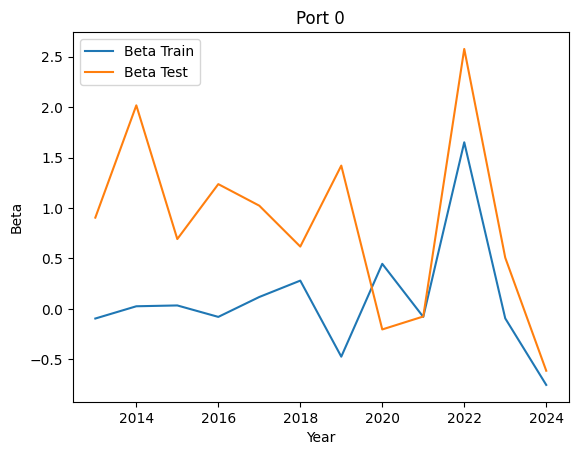

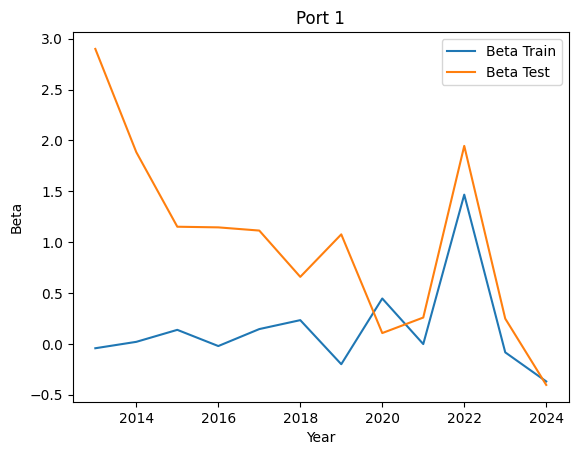

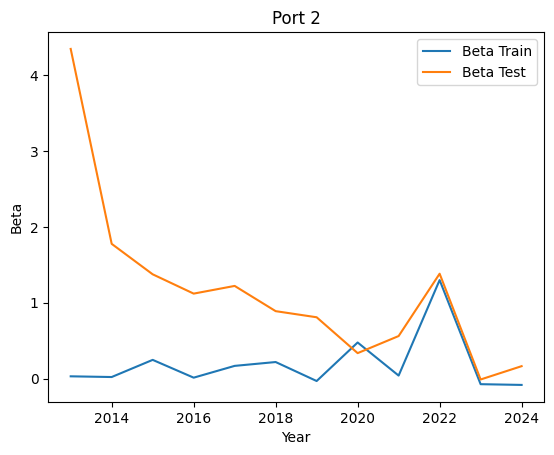

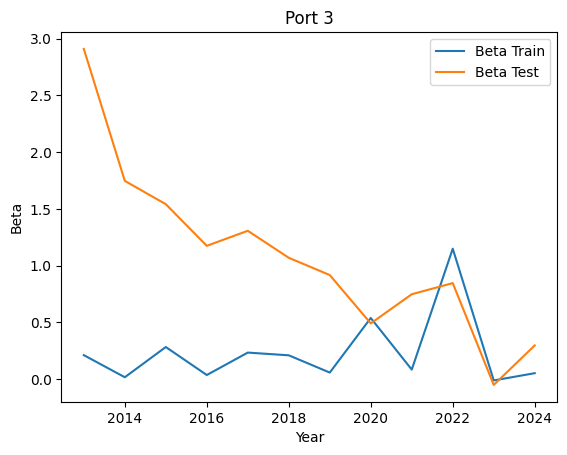

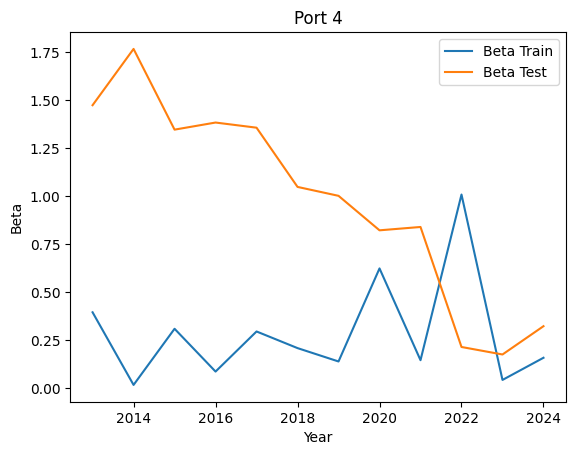

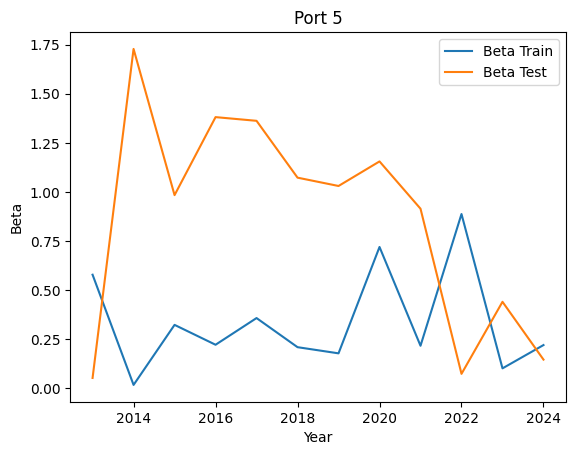

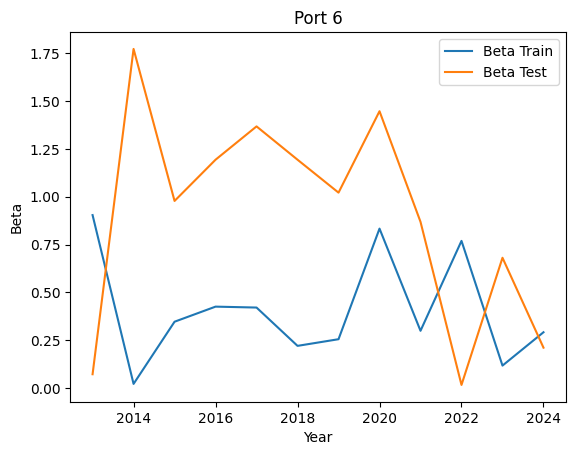

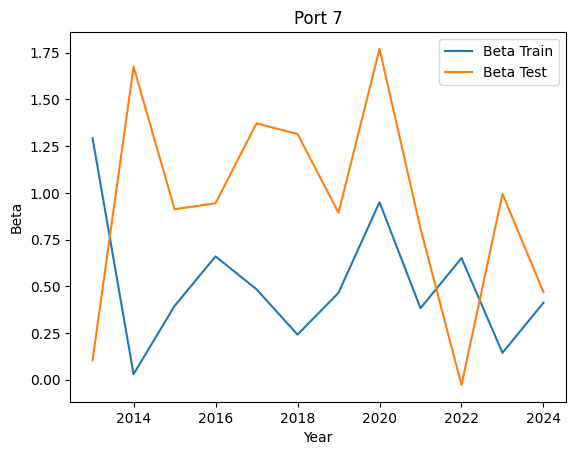

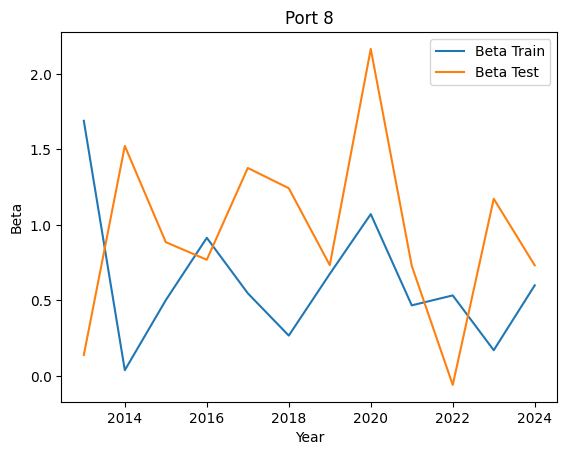

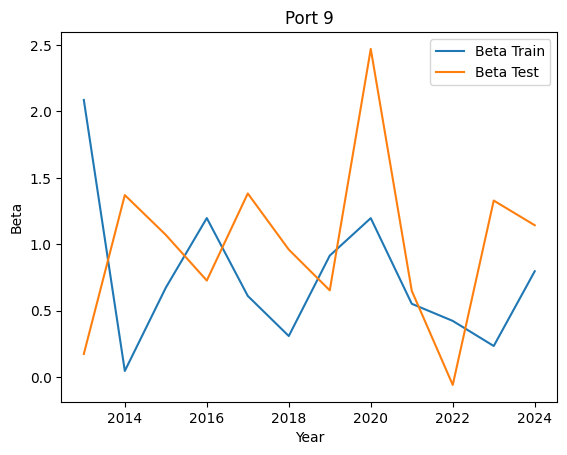

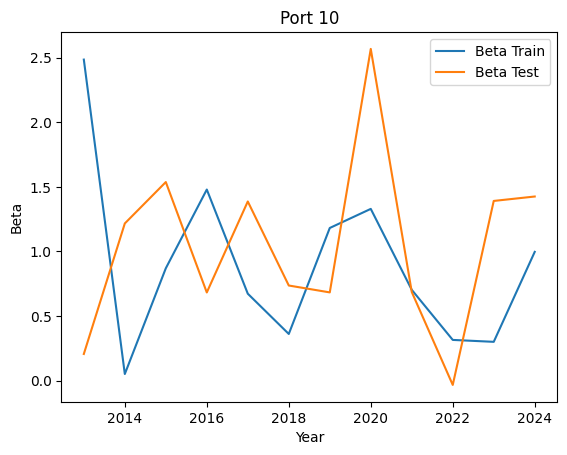

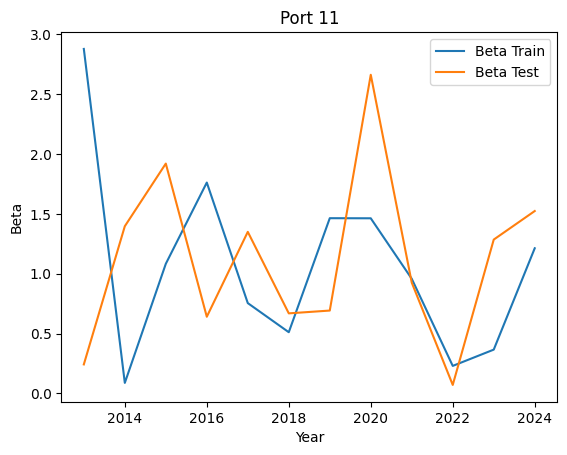

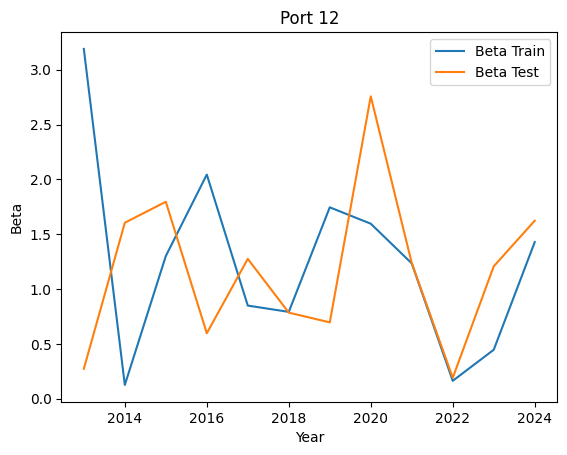

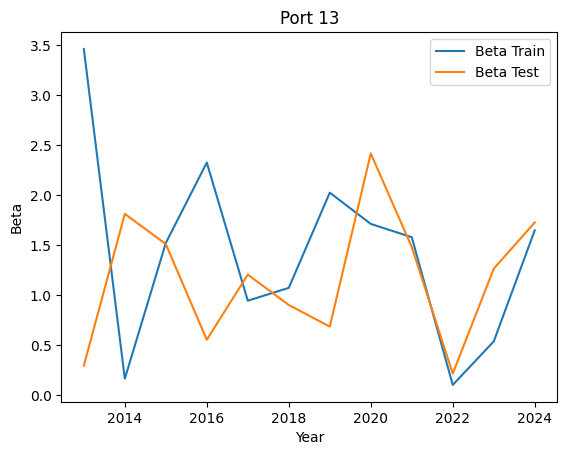

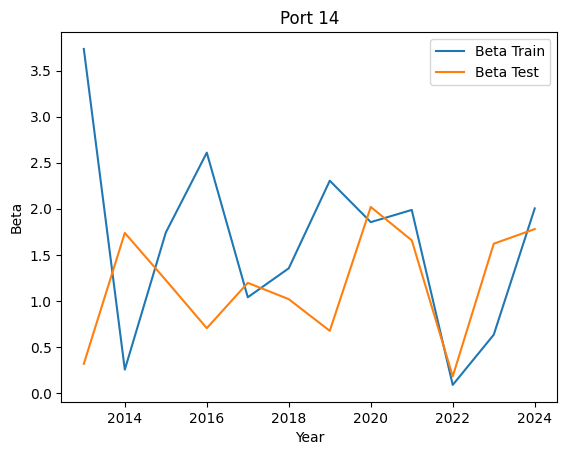

In [14]:
import matplotlib.pyplot as plt

ports = result["port"].unique()
for port in ports:
    port_data = result[result["port"] == port].copy()
    plt.figure()
    port_data.sort_values("year", ascending=True, inplace=True)
    plt.plot(port_data["year"], port_data["beta_train"], label="Beta Train")
    plt.plot(port_data["year"], port_data["beta_test"], label="Beta Test")
    plt.xlabel("Year")
    plt.ylabel("Beta")
    plt.title(f"Port {port}")
    plt.legend()
    plt.show()

## ttest for comparing train and test: return and volatility


=== Portfolio Statistical Tests Results ===



,category,hypothesis,t_statistic,p_value,conclusion,significance
Returns (Test ≤ Train),Returns,H₀: test_return ≤ train_return,-2.4354,0.0076,Reject,Significant
Volatility (Test ≥ Train),Volatility,H₀: test_std ≥ train_std,3.7698,0.0001,Reject,Significant
Returns (Test > Train),Returns,H₀: test_return > train_return,-2.4354,0.9924,Fail to reject,Not significant
Volatility (Test < Train),Volatility,H₀: test_std < train_std,3.7698,0.9999,Fail to reject,Not significant
Returns Equality,Returns,H₀: test_return = train_return,-2.4354,0.0153,Reject,Significant
Volatility Equality,Volatility,H₀: test_std = train_std,3.7698,0.0002,Reject,Significant


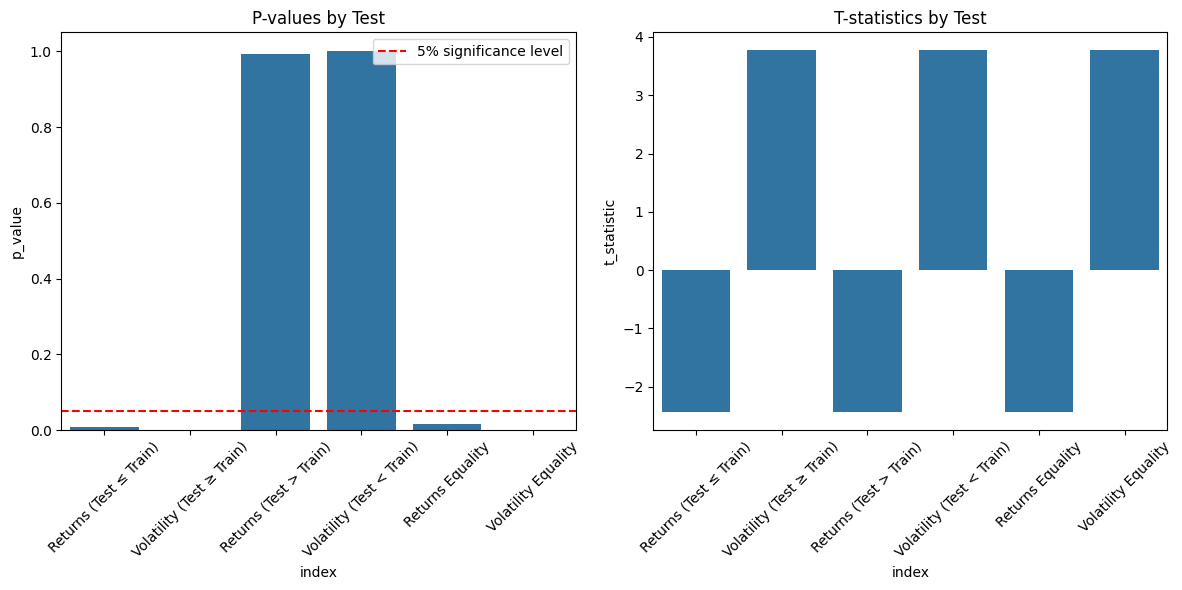

In [16]:
test_results = perform_portfolio_tests(results)